In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
print("loading sucessful")

loading sucessful


## 2.1 Random Sampling and Sample Bias
Sample,Polulation, N(n), Random sampling, Stratified sampling, Simple random sample, Sample Bias.

Sample is a subset from a larger dataset which we called as Population.
Random sampling is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw.

Data quality in data science involves completeness, consistency of fomat, cleanliness, and accuracy of individual data points. Statistics adds the notion of representativeness.


- Bias: Statistical bias refers to measurement or sampling erros that are systematic and produced by the measurement of sampling process.
- Random Selection: In stratified sampling, the population is divided up into strata, and random samples are taken from each stratum.
- Size vs Quality: 
  - Time and effort spent on random ampling not only reduce bias, but also allow greater attention to data exploration and data quality. (Reson: missing data and outliers may contain useful information, Data plotting and manual inspection bog doewn if there is too much data.)
  - Big data problem - only when such enormous quantities of data are accumulated can effective search results be returned for most queries. And the more data accumulates, the better the results.
 - Sample Mean vs Population Mean: Information about samples is observed, and information about large populations is often inferred from smaller samples.
 
 
### Key Ideas:
- Even in the era of big data, random sampling remains an important arrow in the data scientist's quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population
- Data quality is often more important than data quantity, and random sapmling can reduce bias and facilitate quality imporvement that would be prohibitively expensive.


## 2.2 Selection Bias
Bias,
Data snooping, 
Vast search effect

- Selection Bias refers to the practce of selectively choosing data - consciously or unconsciously - in a way that leads to a conclusion that is misleading or ephemeral.
- Dive into the senario, understand data.
- Regression to the maen refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones
- Regression to the mean is a consequence of a partcular form of selection bias.

### Key Ideas
- Specifying a hypothesis, then collcecting data following randomization and random sampling principles, ensures against bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process( repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).


## 2.3 Sampling Distribution of a Statistic
Sample statistic, Data distribution, sampling distribution, central limit theorem, standard error.

In [13]:
data = pd.read_csv('../Data/loans_income.csv')
data.describe()

,x
count,50000.00000
mean,68760.51844
std,32872.03537
min,4000.00000
25%,45000.00000
50%,62000.00000
75%,85000.00000
max,199000.00000


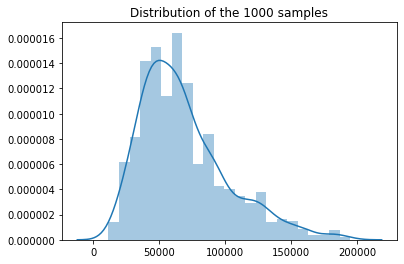

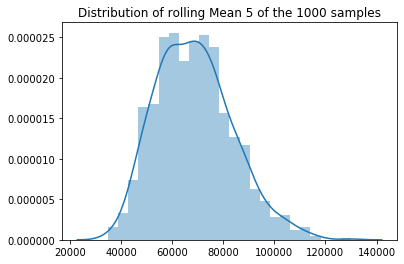

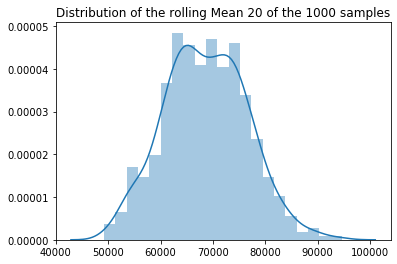

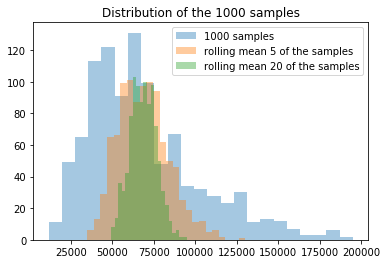

In [15]:
# Take 1000 samples from the data which includes 50000. 
sample = data.sample(n=1000)

#Calculate rolling mean 5 and 20 of the samples, and drop all the items with missing data.
sample_mean_5 = sample.rolling(5).mean().dropna()
sample_mean_20 = sample.rolling(20).mean().dropna()

#Draw the distplot 
sns.distplot(sample)
plt.title('Distribution of the 1000 samples')
plt.show()

sns.distplot(sample_mean_5)
plt.title('Distribution of rolling Mean 5 of the 1000 samples')
plt.show()

sns.distplot(sample_mean_20)
plt.title('Distribution of the rolling Mean 20 of the 1000 samples')
plt.show()

sns.distplot(sample,kde=False,label="1000 samples")
sns.distplot(sample_mean_5,kde=False, label="rolling mean 5 of the samples")
sns.distplot(sample_mean_20,kde=False,label="rolling mean 20 of the samples")
plt.title('Distribution of the 1000 samples')
plt.legend()

#### Central Limit Theorem
It refers to that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.
#### Standard Error
It is a single metric that sums up the variability in the sampling distribuion for a statistic.
- Standard error =SE =s/sqrt(n)
  - s = standard deviation
  - n = number of samples
  
### Key Ideas
- The frequency distribution of a sample statistics tells us how that metric would turn out differently from sample to sample.
- This sampling distribution can be estimated via the bootstrap, or via formulas that rely on the central limit theorem.
- A key metric that sums up the variability of a sample statistic is its standard error.

## 2.4 The Bootstrap
Bootstrap sample, resampling

To draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample.

Resampling: the process of taking repeated samples from observed data, contains both bootstrap and permutation (shuffling) procedures.

#### Bootstrap is used for bagging and boosting in Descision Tree and Random Forest.

### Key Ideas
- The bootstrap is a powerful toll for assessing the variability of a sample statistic.
- The bootstrap can be applied in similar fashion in a wide variety of circumstances, without extensive study of mathematical approximations to sampling distributions.
- It also allows us to estimate sampling distributions for statistics where no mathematical approximation has been developed.
- When applied to predictive models, aggregating multiple bootstrap sample predictions(bagging) outperforms the use of a single model.

Stats of the population

In [24]:
print("Mean of total population: ", data.x.mean())
print("Median of total population: ", np.median(data.x))
print("Std of total population:", data.x.std())
print("Standard error of total population", stats.sem(data.x))

Mean of total population:  68760.51844
Median of total population:  62000.0
Std of total population: 32872.035369850266
Standard error of total population 147.00821129152527


Stasts of Bootstrap with size 1000，5000，10000，20000

In [18]:
size=[1000,5000,10000,20000]

for i in size:
    print("The bootstrap stats of ",i," sample\n")
    samples = np.random.choice(data.x,size=i,replace=True)
    print("Mean of Bootstrap: ",samples.mean())
    print("Median of Bootstrap: ",bs.bootstrap(samples, stat_func=bs_stats.mean))
    print("STD of Bootstrap: ",samples.std())
    print("Standard error of Bootstrap: ",stats.sem(samples))
    print("\n--------------------------------------------------------\n")

The bootstrap stats of  1000  sample

Mean of Bootstrap:  68427.07
Median of Bootstrap:  68427.07    (66477.33340000002, 70420.02022500001)
STD of Bootstrap:  32159.96426653954
Standard error of Bootstrap:  1017.4962408900219

--------------------------------------------------------

The bootstrap stats of  5000  sample

Mean of Bootstrap:  69367.3306
Median of Bootstrap:  69367.3306    (68457.93050500001, 70275.01363000002)
STD of Bootstrap:  32841.38696513446
Standard error of Bootstrap:  464.4938002350861

--------------------------------------------------------

The bootstrap stats of  10000  sample

Mean of Bootstrap:  68443.2743
Median of Bootstrap:  68443.2743    (67800.57214750002, 69075.5583325)
STD of Bootstrap:  32562.00582141493
Standard error of Bootstrap:  325.63634043823697

--------------------------------------------------------

The bootstrap stats of  20000  sample

Mean of Bootstrap:  68524.43945
Median of Bootstrap:  68524.43945    (68071.3021025, 68973.96713500001

## 2.5 Confidence Intervals
Confidence level: The percentage of confidence intervals, constricted in the same way from the same population, expected to contain the statistic of interest.

Interval endpoints: The top and bottom of the confidence interval.

### Key Ideas:
- Confidence intervals are the typical way to present estimates as an interval range.
- The more data you have, the less variable a sample estimate will be.
- The lower the level of confidence you can tolerate, the narrower the confidence interval will be.
- The bootstrap is an effective way to construct confidence intervals.

## 2.6 Normal Distribution

### Key Ideas:
Error: the difference between a data point and a predicted or average value

Standardize: Subtract the mean and divide by the standard deviation.

Z-score: The result of standardizing an individual data point.

Standard normal: A normal distribution with mean =0 and standard deviation = 1

QQ-plot: to visualize how close a sample distribution is to a normal distribution.


- The normal distribution was essential to the historical development of statistics, as it peritted mathematical approximation of uncertainty and variablity.

- While raw data is typically not normally distributed, errors often are, as are averages and totals in large samples.

- To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation; you can then compare the data to a normal distribution.


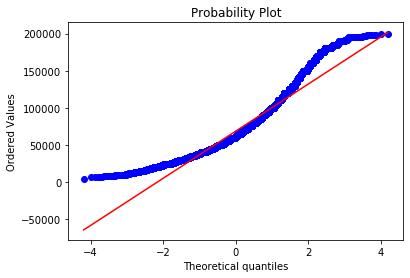

In [30]:
stats.probplot(data.x, dist="norm", plot=plt)
plt.show()

 The chart above is not a normal distribution.
 
 QQ-plot drawn from a normal distribution should looks like:

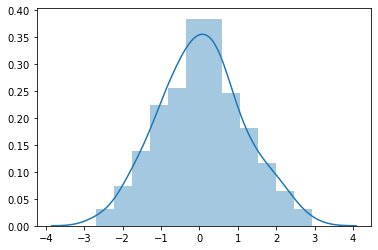

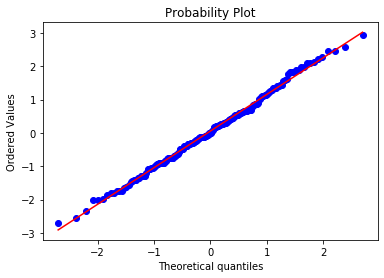

In [39]:
test= np.random.normal(loc=0,scale=1, size=200)
sns.distplot(test)
plt.show()
stats.probplot(test, dist="norm", plot=plt)
plt.show()

## 2.7 Long Tailed Distribution


Tail: the long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

Skew: Where one tail of a distribution is longer than the other.

### Key Ideas:

- Most data is not normally distributed.
- Assuming a normal distribution can lead to underestimation of extreme events("black swans")

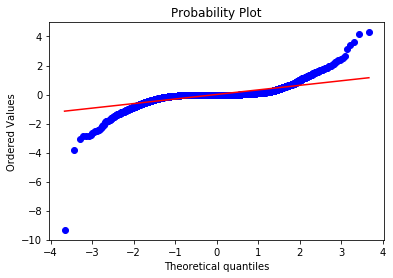

In [58]:
nflx=pd.read_csv("../Data/sp500_px.csv")
nflx_NFLX=nflx.NFLX
stats.probplot(nflx_NFLX,plot=plt,dist="norm")
plt.show()

c:\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\python37\lib\site-packages\numpy\lib\function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
c:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


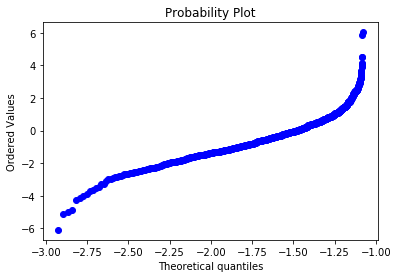

In [61]:
nflx_NFLX=nflx.NFLX
adjusted=np.diff(np.log(nflx_NFLX))
stats.probplot(adjusted,plot=plt,dist="norm")
plt.show()

## 2.8 Student's t-Distribution


n: sample size

Degree of freedom: A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and number of groups.

t-statistics often used in A/B test and regressions.

### Key Ideas

- The t-distribution is actually a family of distributions resembling the normal distribution, but with thicker tails.

- It is widely used as a reference basis of the distribution of sample means, differences between two sample means, regression parameters, and more.

## 2.9 Binomial Distribution

Trail: An event with a discrete outcome

success: The outcom of interest for a trail (Synoyms: 1 is as opposed to 0)

Binomial: Having two outcomes (Synoyms: yes/no, 0/1)

Binomial trail: A trail with two outcomes.

Binomial distribution: Distribution of number of successes in x trails. (Bernoulli distribution)

- The mean of a binomial distribution is n * p
- The variance is n * p * (1-p)

### Key Ideas:

- Binomial outcomes are important to model, since they represent, among other tings, fundamental decisions.
- A binomail trial is an experiment with two possible outcomes: one with probability p and the other with probability 1-p
- With large n, and provided p is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution.


In [77]:
# n times trails, each trial is p=0.4
n, p = 5, 0.4
k=2
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
print("mean: ",mean,"\nvar: ",var,"\nskew: ",skew,"\nkurt:",kurt)


b = stats.binom(5,0.1)
probability = b.pmf(2)

print("\nprobability of observing exactly x=2 successes in n=5 trails:", probability)

mean:  2.0 
var:  1.2 
skew:  0.18257418583505533 
kurt: -0.3666666666666668

probability of observing exactly x=2 successes in n=5 trails: 0.0729


## 2.10 Poisson and Related Distributions

Lambda: The rate at which events occur

Poisson distribution: The frequency distribution of the number of events in sampled units of time or space.

Exponential distribution: The frequency distribution of the time or distance from one event to the next event.

Weibull distribution: A generalized version of the exponential, in which the event rate is allowed to shift over time.

Poisson Distribution: If incoming customer service calls average 2 per minute, this code will simulate 100 minutes, returning the number bof calls in each of those 100 minutes


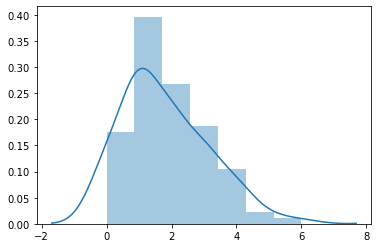

In [89]:
poisson= np.random.poisson(lam=2, size=100)
sns.distplot(poisson)

print("Poisson Distribution: If incoming customer service calls average 2 per minute, this code will simulate 100 minutes, returning the number bof calls in each of those 100 minutes")

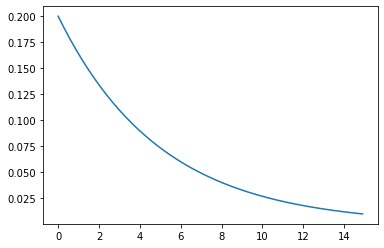

Exponential Distrubution: Simulation of 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute


In [90]:
exponential= np.random.exponential(scale=0.2,size=100)

lambd = 0.2
x = np.arange(0,15,0.1)
y = lambd*np.exp(-lambd*x)
plt.plot(x,y)
plt.show()

print("Exponential Distrubution: Simulation of 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute")

Weibull Distribution


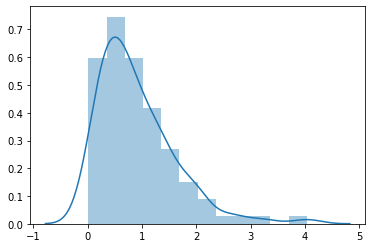

In [100]:
weibull=np.random.weibull(a=1.5, size=100)

sns.distplot(weibull)
print("Weibull Distribution")